# GHZ state 

In physics, in the area of quantum information theory, a Greenberger–Horne–Zeilinger state (GHZ state) is a certain type of entangled quantum state that involves at least three subsystems (particle states, qubits, or qudits). The four-particle version was first studied by Daniel Greenberger, Michael Horne and Anton Zeilinger in 1989, and the three-particle version was introduced by N. David Mermin in 1990. Extremely non-classical properties of the state have been observed. GHZ states for large numbers of qubits are theorized to give enhanced performance for metrology compared to other qubit superposition states. ([Wikipedia GHZ state article](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state))

$|GHZ\rangle = \frac{1}{\sqrt{2}}(|000\dots 0\rangle + |111\dots 1\rangle)$

$|GHZ\rangle = \frac{1}{\sqrt{2}}\sum_{i=0}^1|i\rangle^{\otimes n}; \ n \ \textrm{is the number of qubits}$

# Imports

In [1]:
import matplotlib.pyplot as plt

from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator

from ghz_state_generator import create_ghz_state_quantum_circuit

# Settings

In [2]:
num_qubits = 20
shots = 1024
backend = AerSimulator()

qubits = QuantumRegister(size=num_qubits, name="qubits")
bits = ClassicalRegister(size=num_qubits, name="bits")

# 1) Standard GHZ state quantum circuit

The standard circuit to create a GHZ state

In [3]:
qc = QuantumCircuit(qubits)

qc.h(qubit=qubits[0])
for i in range(1, num_qubits):
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[i])

Note that the circuit depth scaling with the number of qubits

In [4]:
qc.depth()

20

The standard quantum circuit to create a GHZ state

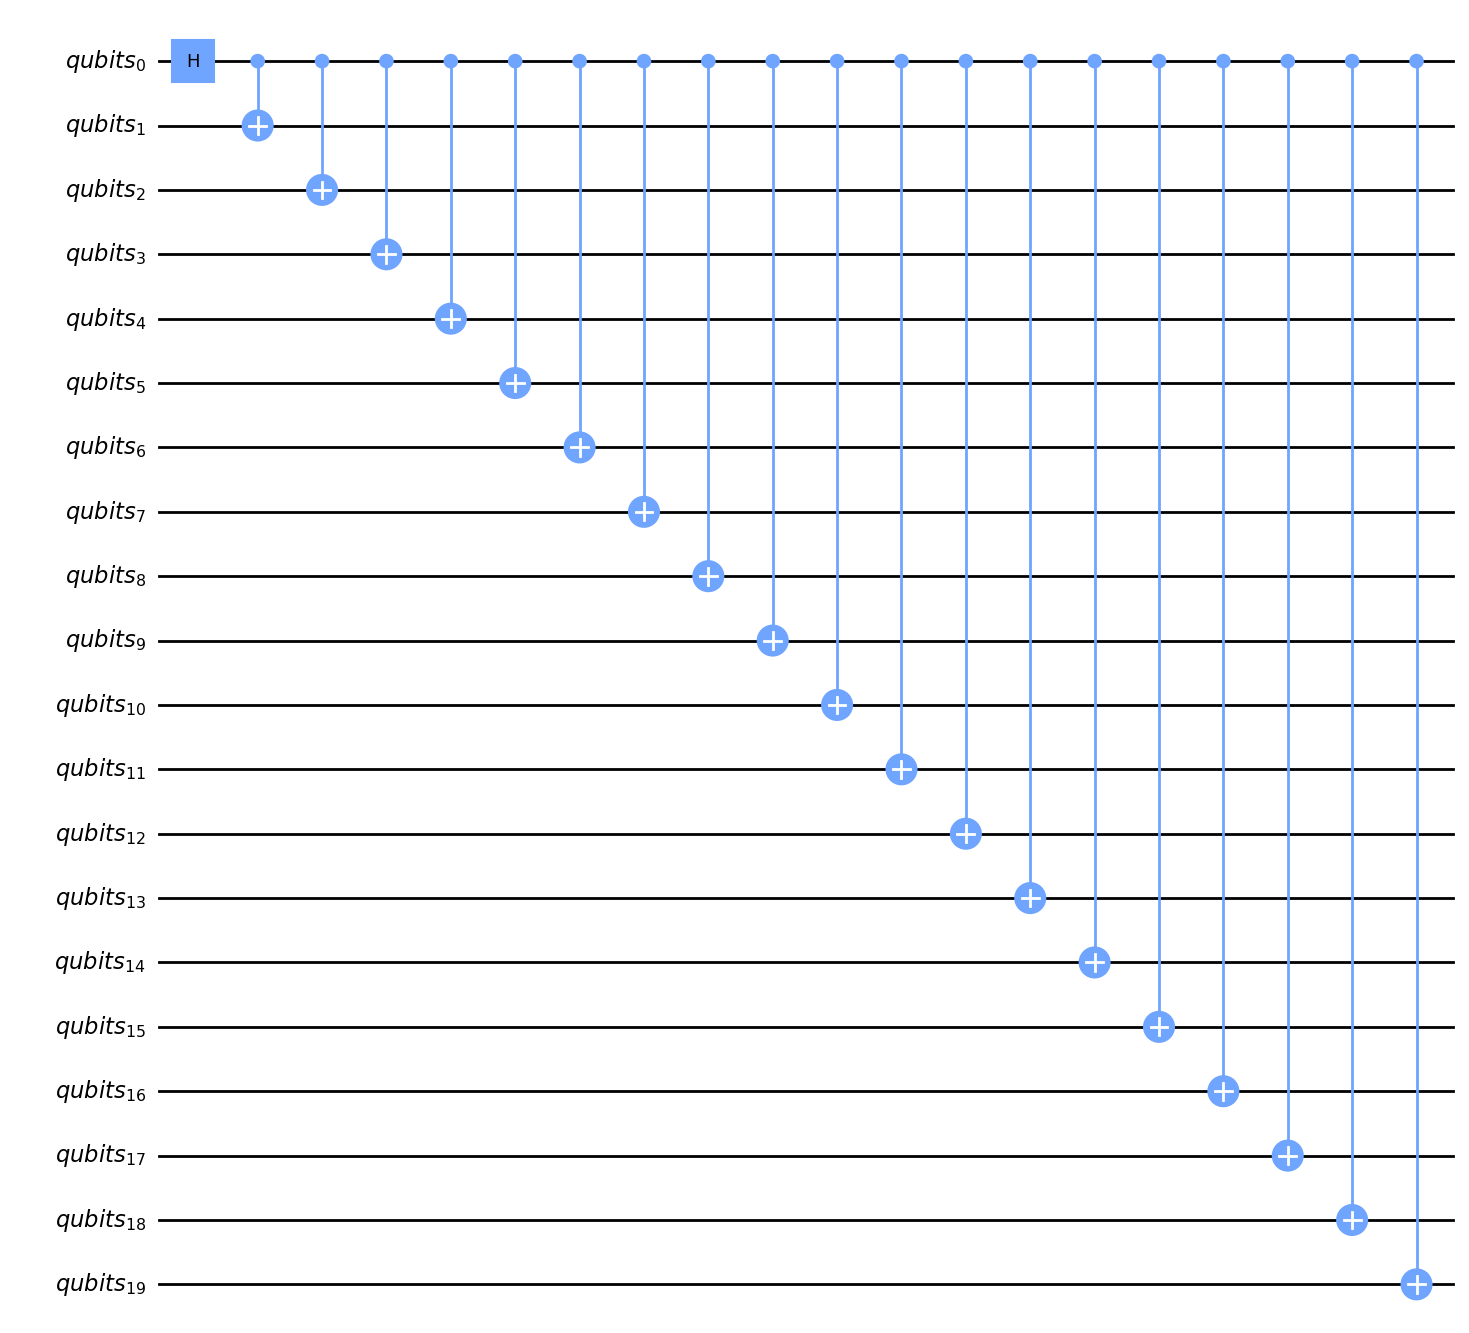

In [5]:
qc.draw(output="mpl")

Checking if the quantum circuit above creates the expected quantum state

In [6]:
qc = QuantumCircuit(qubits, bits)

qc.h(qubit=qubits[0])
for i in range(1, num_qubits):
    qc.cx(control_qubit=qubits[0], target_qubit=qubits[i])
qc.measure(qubit=qubits, cbit=bits)
counts = backend.run(qc, shots=shots).result().get_counts()
print(counts)

{'00000000000000000000': 500, '11111111111111111111': 524}


# 2) Low depth GHZ state quantum circuit

Creating the new version of the 20 qubit GHZ state quantum circuit that promisses a reduction on circuit depth

In [7]:
qc = create_ghz_state_quantum_circuit(num_qubits=num_qubits)

Calculating the circuit depth of the quantum circuit defined above we obtain the result below

In [8]:
qc.depth()

7

Note that the result obtained above is less than 20 (the circuit depth of the standard approach). Actually this new approach has a circuit depth 65% less than standard approach. 

The new quantum circuit to create the 20 qubits GHZ state

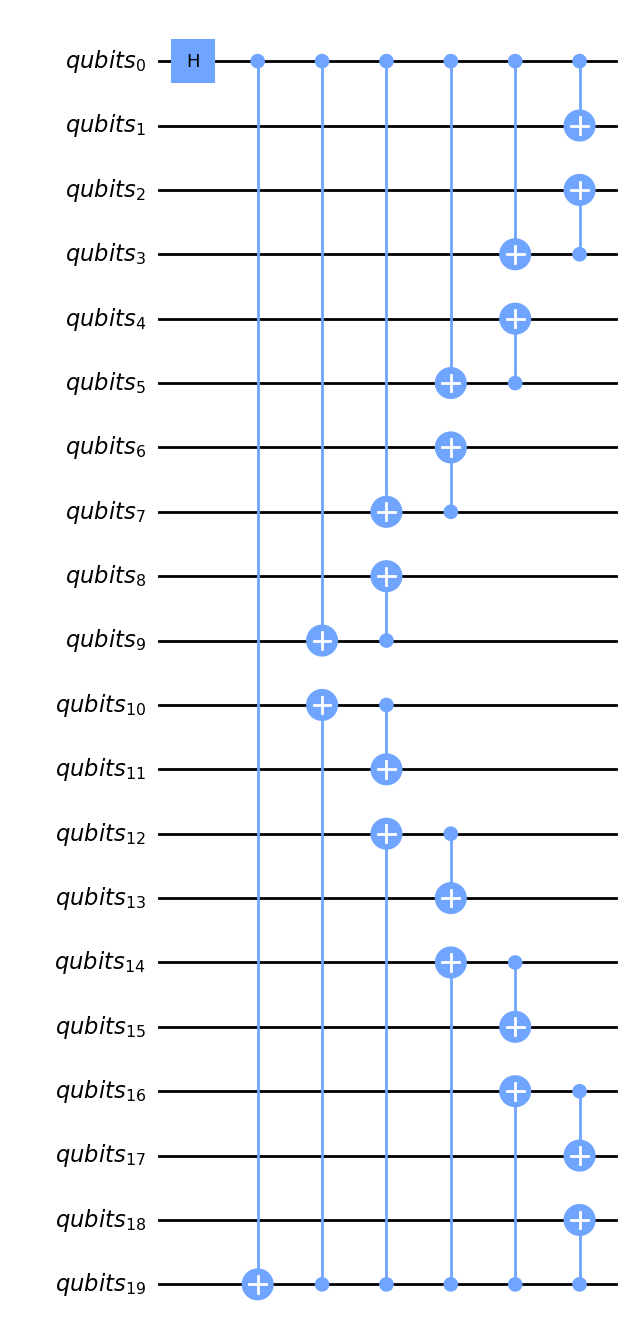

In [9]:
qc.draw(output="mpl")

Checking if the quantum circuit above creates the expected quantum state

In [10]:
qc = create_ghz_state_quantum_circuit(num_qubits=num_qubits, add_measurements=True)
counts = backend.run(qc, shots=shots).result().get_counts()
print(counts)

{'11111111111111111111': 502, '00000000000000000000': 522}


# 3) Circuit depth study

Here we want to make a comparision between the two approaches. The standard approach scales linearly with the number of qubits, meanwhile the new approach seems to be very efficient in the task of reduce the circuit depth. In order to compare these two approaches, we will to create GHZ state quantum circuit with number of qubits inside the range $[2, 128]$. 

In [11]:
num_qubits_list = [*range(2, 128)]
standard_depth = [*range(2, 128)]

low_depth = []
for i in range(2, 128):
    qc = create_ghz_state_quantum_circuit(num_qubits=i, add_measurements=False)
    low_depth.append(qc.depth())

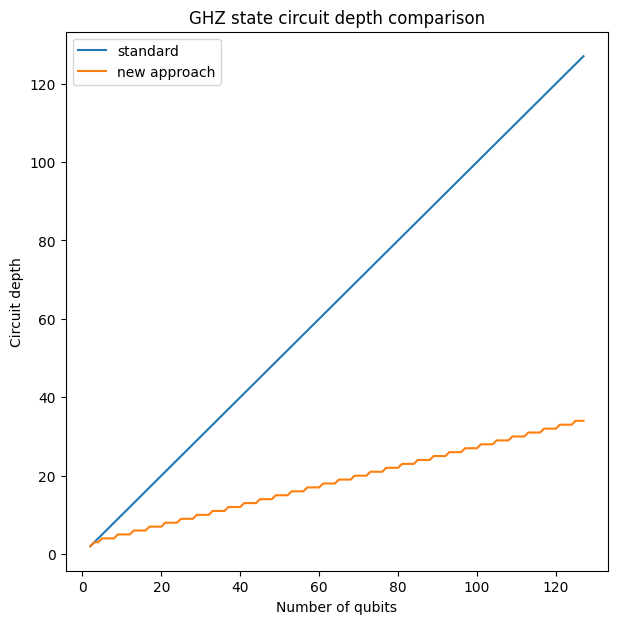

In [12]:
fig, ax = plt.subplots()

fig.set_size_inches((7, 7))

ax.plot(num_qubits_list, standard_depth, label="standard", linestyle="-")
ax.plot(num_qubits_list, low_depth, label="new approach", linestyle="-")
ax.set_xlabel("Number of qubits")
ax.set_ylabel("Circuit depth")
ax.set_title("GHZ state circuit depth comparison")
ax.legend()

plt.show()